In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Day 2 codes

/content/drive/MyDrive/Day 2 codes


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# since we don't want the Id column, we use iloc method to remove that from our final dataset
df = df.iloc[:,1:]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Some Exploratory Data Analysis With Iris

In [ ]:
# Dataset Information
print('Rows :',df.shape[0])
print('Columns :',df.shape[1])

Rows : 150
Columns : 5


Now, when we train any algorithm, the number of features and their correlation plays an important role. If there are features and many of the features are highly correlated, then training an algorithm with all the featues will reduce the accuracy. Thus features selection should be done carefully. This dataset has less featues but still we will see the correlation.

In [ ]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Target Column Distribution
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

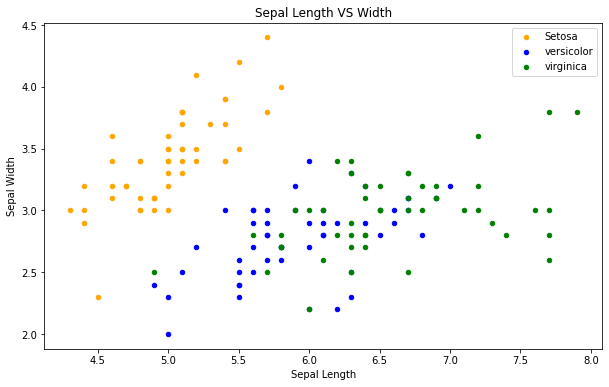

In [ ]:
iris = df
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

The above graph shows relationship between the sepal length and width. Now we will check relationship between the petal length and width.

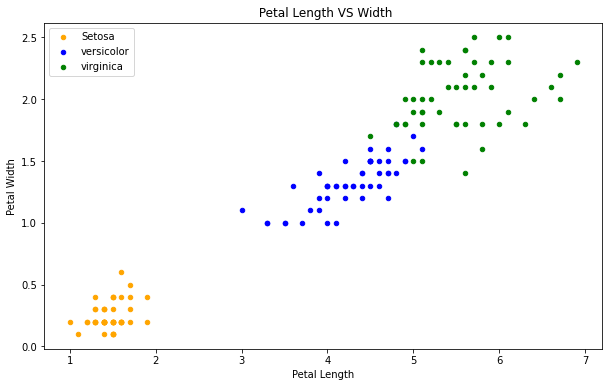

In [ ]:
fig = iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

As we can see that the Petal Features are giving a better cluster division compared to the Sepal features. This is an indication that the Petals can help in better and accurate Predictions over the Sepal. We will check that later.

## Now let us see how are the length and width are distributed

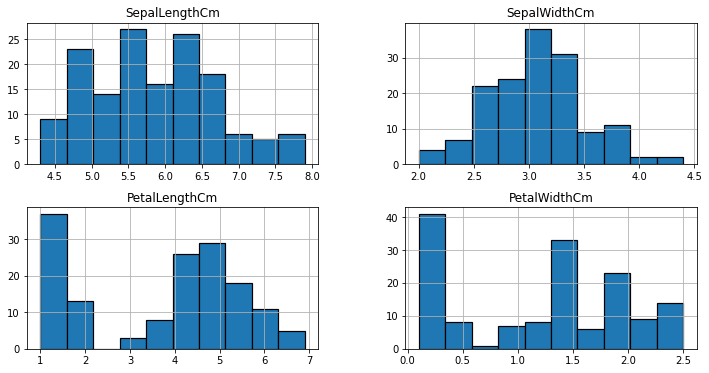

In [ ]:
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

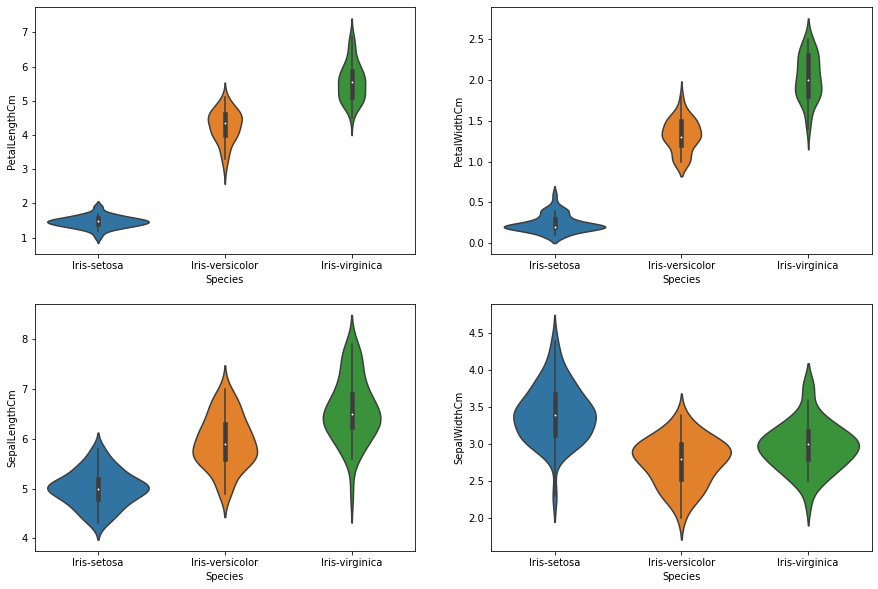

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)

The violinplot shows density of the length and width in the species. The thinner part denotes that there is less density whereas the fatter part conveys higher density
<br>

### Now the given problem is a classification problem.. Thus we will be using the classification algorithms to build a model.

__Classification__: samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data

__Regression__: if the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.

<br>
Before we start, we need to clear some ML notations.

__attributes__-->An attribute is a property of an instance that may be used to determine its classification. In the following dataset, the attributes are the petal and sepal length and width. It is also known as Features.

__Target variable__, in the machine learning context is the variable that is or should be the output. Here the target variables are the 3 flower species.

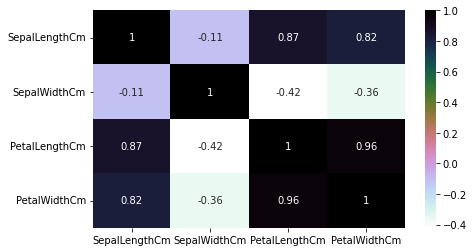

In [ ]:
plt.figure(figsize=(7,4)) 
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

Observation--->

The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated

We will use all the features for training the algorithm and check the accuracy.



### Steps To Be followed When Applying an Algorithm \n

1. Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it will help in training the model better.

2. Select any algorithm based on the problem (classification or regression) whatever you feel may be good.
3. Then pass the training dataset to the algorithm to train it. We use the .fit() method
4. Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method.
5. We then check the accuracy by passing the predicted outcome and the actual output to the model.

# Splitting The Data into Training And Testing Dataset

In [ ]:
train, test = train_test_split(df, test_size = 0.3)
# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [ ]:
features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
train_X = train[features]# taking the training data features
train_y=train.Species# output of our training data
test_X= test[features] # taking test data features
test_y =test.Species

In [ ]:
le = LabelEncoder()
train_y = le.fit_transform(train_y)
test_y = le.transform(test_y)

In [ ]:
train_y

array([2, 2, 1, 2, 1, 2, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2,
       2, 2, 0, 2, 2, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 2, 0, 0, 0, 0, 1, 0,
       2, 2, 1, 2, 1, 0, 0, 0, 2, 2, 1, 2, 1, 2, 0, 2, 1, 0, 0, 1, 1, 1,
       2, 0, 2, 2, 1, 1, 2, 0, 2, 1, 2, 1, 1, 0, 0, 2, 0, 0, 2, 1, 2, 1,
       0, 1, 0, 1, 1, 2, 0, 1, 2, 0, 1, 1, 0, 1, 2, 2, 1])

## Evaluation Metrics Used

1. __Confusion Matrix__ <br>
A confusion matrix is an N X N matrix, where N is the number of classes being predicted. For the problem in hand, we have N=2, and hence we get a 2 X 2 matrix. Here are a few definitions, you need to remember for a confusion matrix :

2.  __Accuracy__ : the proportion of the total number of predictions that were correct.
3. __Positive Predictive Value or Precision__ : the proportion of positive cases that were correctly identified.
4. __Negative Predictive Value__ : the proportion of negative cases that were correctly identified.
5. __Sensitivity or Recall__ : the proportion of actual positive cases which are correctly identified.
6. __Specificity__ : the proportion of actual negative cases which are correctly identified.

7. __F1 score__:  F1-Score is the harmonic mean of precision and recall values for a classification problem. The formula for F1-Score is as follows:
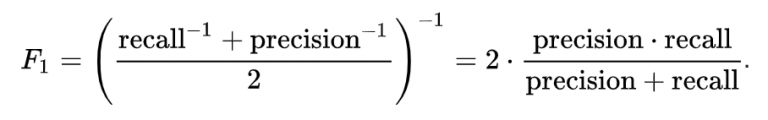



### Now lets implement the ml models

### Logistic Regression

In [ ]:
model = LogisticRegression() #select the algorithm
model.fit(train_X,train_y)# we train the algorithm with the training data and the training output
prediction=model.predict(test_X)#now we pass the testing data to the trained algorithm

print('The accuracy is',accuracy_score(prediction,test_y))#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output
print("The classification report is")
print(classification_report(prediction,test_y))#now we show the classification report of the algorithm, which gives us the recall, precision, f1 score of the algorithm 
#we pass the predicted output by the model and the actual output

The accuracy is 0.9555555555555556
The classification report is
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.88      0.94        17
           2       0.85      1.00      0.92        11

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### Support Vector Machine (SVM)

In [ ]:
model = SVC()
model.fit(train_X,train_y) 
prediction=model.predict(test_X) 
print('The accuracy is:',accuracy_score(prediction,test_y))
print("The classification report is")
print(classification_report(prediction,test_y))

The accuracy is: 0.9555555555555556
The classification report is
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.88      0.94        17
           2       0.85      1.00      0.92        11

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



SVM is giving very good accuracy . We will continue to check the accuracy for different models.

Now we will follow the same steps as above for training various machine learning algorithms.

### K-Nearest Neighbours

In [ ]:
model=KNeighborsClassifier(n_neighbors=8)
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',accuracy_score(prediction,test_y))
print("The classification report is")
print(classification_report(prediction,test_y))

The accuracy of the KNN is 0.9333333333333333
The classification report is
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.83      0.91        18
           2       0.77      1.00      0.87        10

    accuracy                           0.93        45
   macro avg       0.92      0.94      0.93        45
weighted avg       0.95      0.93      0.93        45



### Let's check the accuracy for various values of n for K-Nearest nerighbours  (Hyper- parameter tuning one example)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


([<matplotlib.axis.XTick at 0x7f2dd9e29a90>,
 <a list of 10 Text major ticklabel objects>)

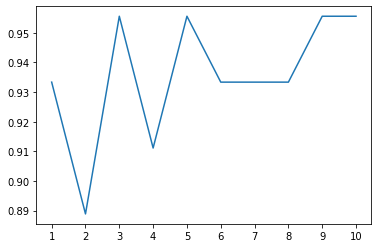

In [ ]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(accuracy_score(prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(x)

Above is the graph showing the accuracy for the KNN models using different values of n.